In [28]:
# algorithm 1
def alg1(data):
  data = list(data)
  changes = True
  while changes:
    changes = False
    for i in range(len(data) - 1):
      if data[i + 1] < data[i]:
        data[i], data[i + 1] = data[i + 1], data[i]
        changes = True
  return data

In [29]:
# algorithm 2
def alg2(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(alg2(data[:split]))
    right = iter(alg2(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)

In [34]:
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

df1 = data1(5)
df1

[31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352]

In [36]:
# sorted ascending dataset
def data2(n):
    return list(range(n))

df2 = data2(10)
df2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
# sorted descending dataset
def data3(n):
    return list(range(n, 0, -1))

df3 = data3(10)
df3

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [62]:
# 3a. Hypothesize the Operation
# Test alg1 on df1,2,3 generated by data1,2,3
print(alg1(df1))
print(alg1(df2))
print(alg1(df3))

# Test alg2 on df1,2,3 generated by data1,2,3
print(alg2(df1))
print(alg2(df2))
print(alg2(df3))

# test on manual random dataset
df4 = [10, 3, 3, 4.1, 0, 7.99, 100, 2, 0, 1, -1, -0.01]
print(alg1(df4))
print(alg2(df4))

# test on empty dataset
df5 = []
print(alg1(df5))
print(alg2(df5))


[31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-1, -0.01, 0, 0, 1, 2, 3, 3, 4.1, 7.99, 10, 100]
[-1, -0.01, 0, 0, 1, 2, 3, 3, 4.1, 7.99, 10, 100]
[]
[]


In [86]:
# 3c Performance Measurement and Analysis
import time
import numpy as np
import matplotlib.pyplot as plt

def time_algorithm(algorithm, original_data):
    times = []
    for attempt in [1, 2, 3]:
        data = list(original_data)
        start = time.perf_counter()
        algorithm(data)
        times.append(time.perf_counter() - start)
    return min(times)

# choose log-spaced sizes
# Generates 8 numbers evenly spaced on a log10 scale from 10^0 to 10^4
sizes = sorted({int(v) for v in np.logspace(0, 4, num=8)})
sizes  

[1, 3, 13, 51, 193, 719, 2682, 10000]

In [91]:
# Time the performance of alg1 on data1
times_a1_d1 = [time_algorithm(alg1, data1(size)) for size in sizes]
times_a1_d1

[3.7497375160455704e-07,
 5.00003807246685e-07,
 8.330098353326321e-07,
 0.0001105829724110663,
 0.0013671659980900586,
 0.04737920896150172,
 0.7581884160172194,
 10.548196875024587]

In [88]:
# Time the performance of alg2 on data1
times_a2_d1 = [time_algorithm(alg2, data1(size)) for size in sizes]
times_a2_d1

[2.92027834802866e-07,
 3.167020622640848e-06,
 2.158299321308732e-05,
 6.679102079942822e-05,
 0.00027304200921207666,
 0.0012139170430600643,
 0.004626166948582977,
 0.02261916600400582]

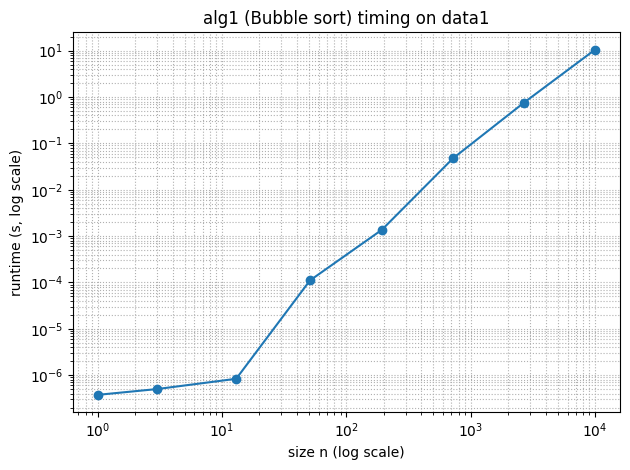

In [107]:
# log-log graph for alg1 on data1
plt.figure()
plt.loglog(sizes, times_a1_d1, marker='o')
plt.xlabel("size n (log scale)")
plt.ylabel("runtime (s, log scale)")
plt.title("alg1 (Bubble sort) timing on data1")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/3c_a1_d1.png", dpi=200)

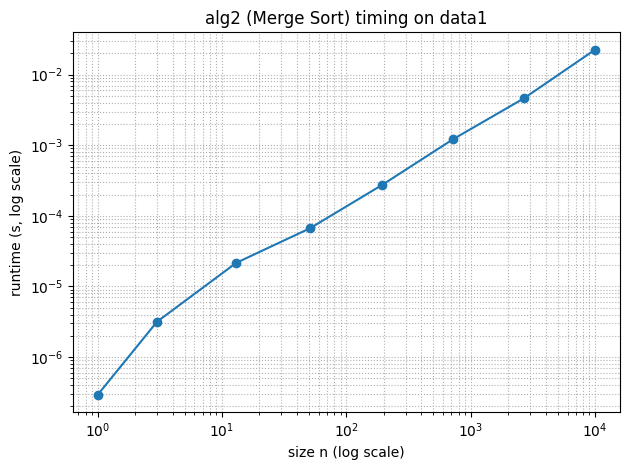

In [108]:
# log-log graph for alg2 on data1
plt.figure()
plt.loglog(sizes, times_a2_d1, marker='o')
plt.xlabel("size n (log scale)")
plt.ylabel("runtime (s, log scale)")
plt.title("alg2 (Merge Sort) timing on data1")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/3c_a2_d1.png", dpi=200)

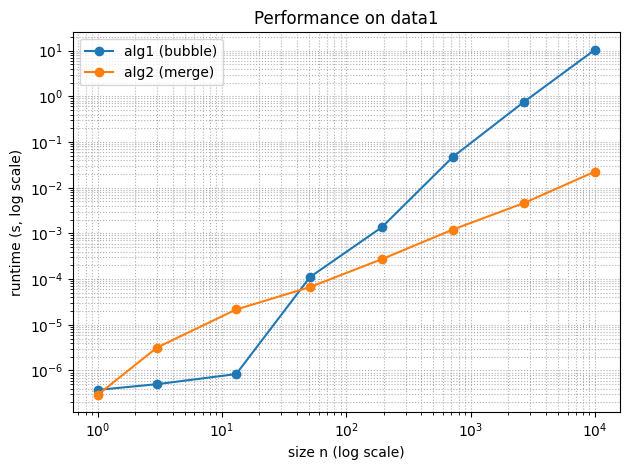

In [97]:
import os
os.makedirs("plots", exist_ok=True)

# Comparison of merge and bubble sorts on data1
plt.figure()
plt.loglog(sizes, times_a1_d1, marker='o', label='alg1 (bubble)')
plt.loglog(sizes, times_a2_d1, marker='o', label='alg2 (merge)')
plt.xlabel("size n (log scale)")
plt.ylabel("runtime (s, log scale)")
plt.title("Performance on data1")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/3c_compare_d1.png", dpi=200)

In [99]:
# times for data2
times_a1_d2 = [time_algorithm(alg1, data2(size)) for size in sizes]
times_a2_d2 = [time_algorithm(alg2, data2(size)) for size in sizes]

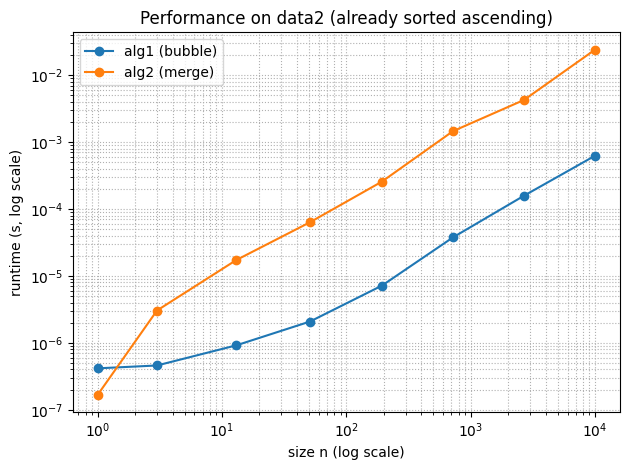

In [101]:
# Comparison of merge and bubble sorts on data2
plt.figure()
plt.loglog(sizes, times_a1_d2, marker='o', label='alg1 (bubble)')
plt.loglog(sizes, times_a2_d2, marker='o', label='alg2 (merge)')
plt.xlabel("size n (log scale)")
plt.ylabel("runtime (s, log scale)")
plt.title("Performance on data2 (already sorted ascending)")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/3c_compare_d2.png", dpi=200)

In [102]:
# times for data3
times_a1_d3 = [time_algorithm(alg1, data3(size)) for size in sizes]
times_a2_d3 = [time_algorithm(alg2, data3(size)) for size in sizes]

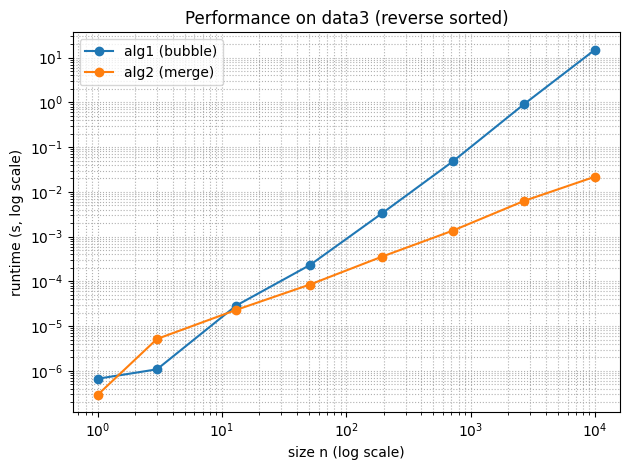

In [103]:
# Comparison of merge and bubble sorts on data3
plt.figure()
plt.loglog(sizes, times_a1_d3, marker='o', label='alg1 (bubble)')
plt.loglog(sizes, times_a2_d3, marker='o', label='alg2 (merge)')
plt.xlabel("size n (log scale)")
plt.ylabel("runtime (s, log scale)")
plt.title("Performance on data3 (sorted descending)")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/3c_compare_d3.png", dpi=200)